In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error as RMSE
from sklearn.cluster import KMeans


In [9]:
rhob_10 = np.loadtxt('rhob_10.csv')
rhob_30 = np.loadtxt('rhob_30.csv')
rhob_50 = np.loadtxt('rhob_50.csv')

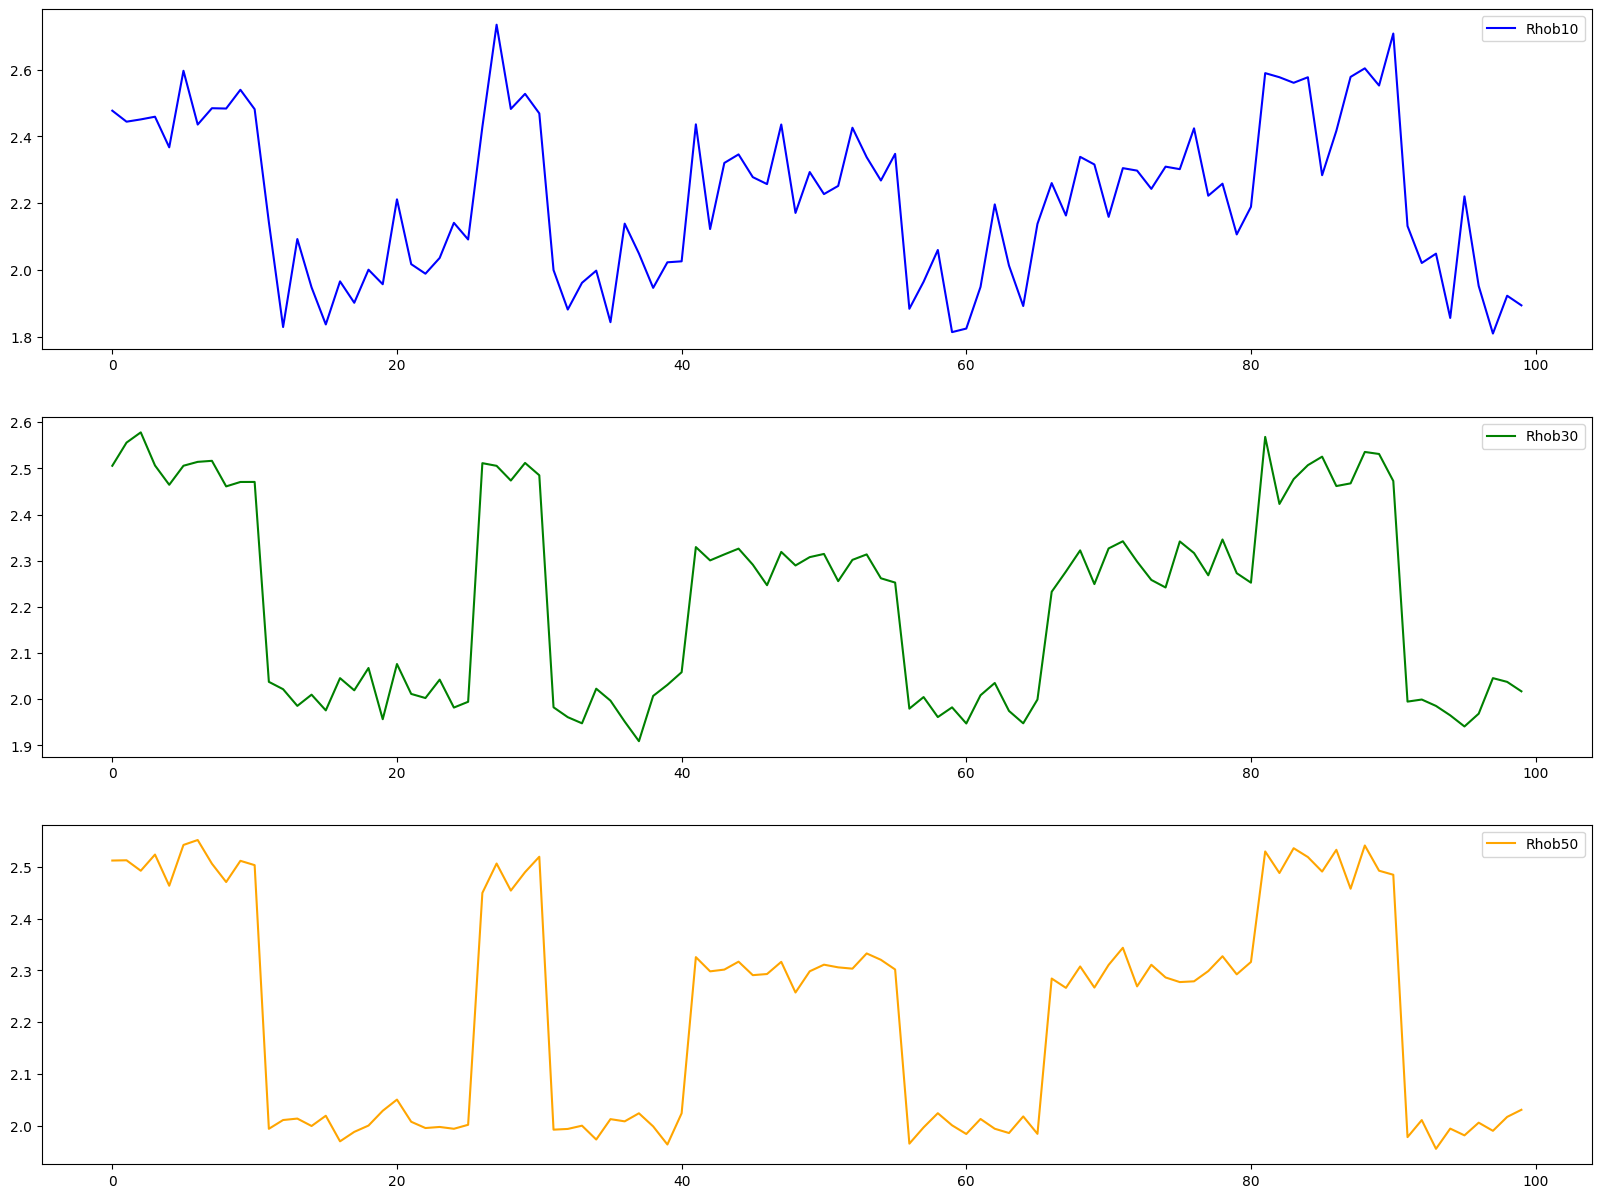

In [46]:
colors = ["blue", "green", "orange"]

rhobs = [(rhob_10, 'Rhob10'), (rhob_30, 'Rhob30'), (rhob_50, 'Rhob50')]

fig, axs = plt.subplots(3, 1, figsize=(20, 15))

for ax, (data, name), color in zip(axs, rhobs, colors):
    ax.plot(np.arange(0, 100, 1), data, label=name, color=color)
    ax.legend(loc="upper right")

plt.show()

In [35]:
def k_means(data, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    data = data.reshape(-1, 1)
    kmeans.fit(data)
    centers = kmeans.cluster_centers_
    pred = kmeans.predict(data)
    return np.array([centers[label] for label in pred])



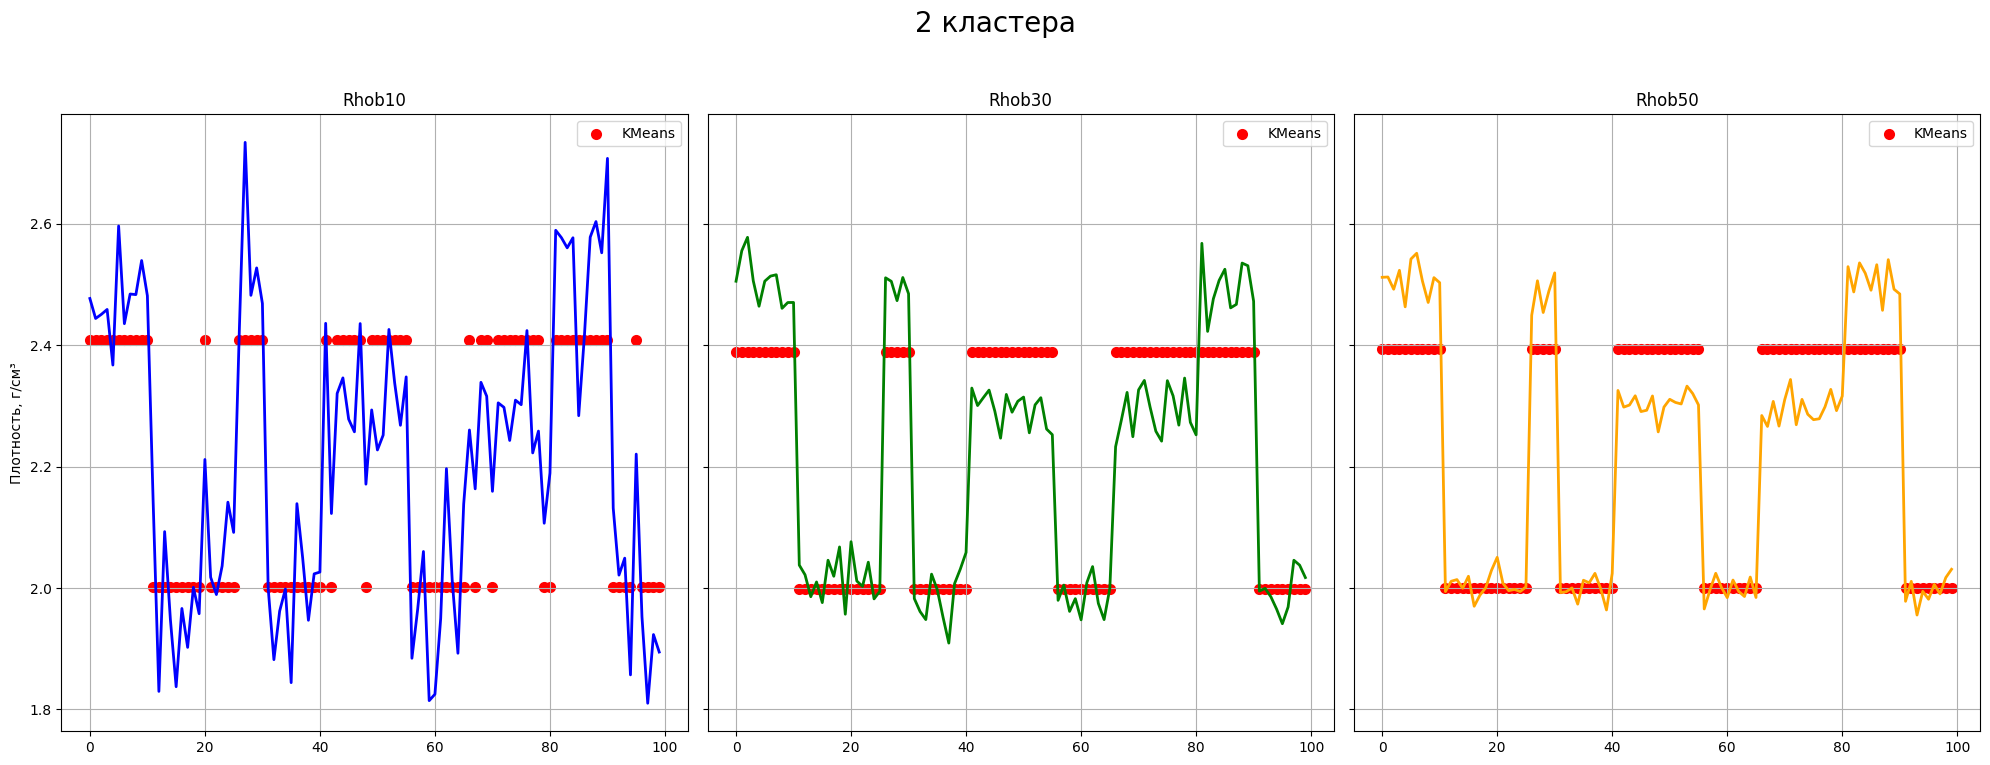

In [43]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8), sharey=True)

for i, ((data, title), color) in enumerate(zip(rhobs, colors)):
    kmeans_result = k_means(data, 2)

    ax = axes[i]
    ax.plot(x, data, linewidth=2, color=color)
    ax.scatter(x, kmeans_result, label="KMeans", linewidth=2, color='red')

    ax.set_title(title)
    if i == 0:
        ax.set_ylabel("Плотность, г/см³")
    ax.legend(loc='upper right')
    ax.grid(True)

fig.suptitle("2 кластера", fontsize=20)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

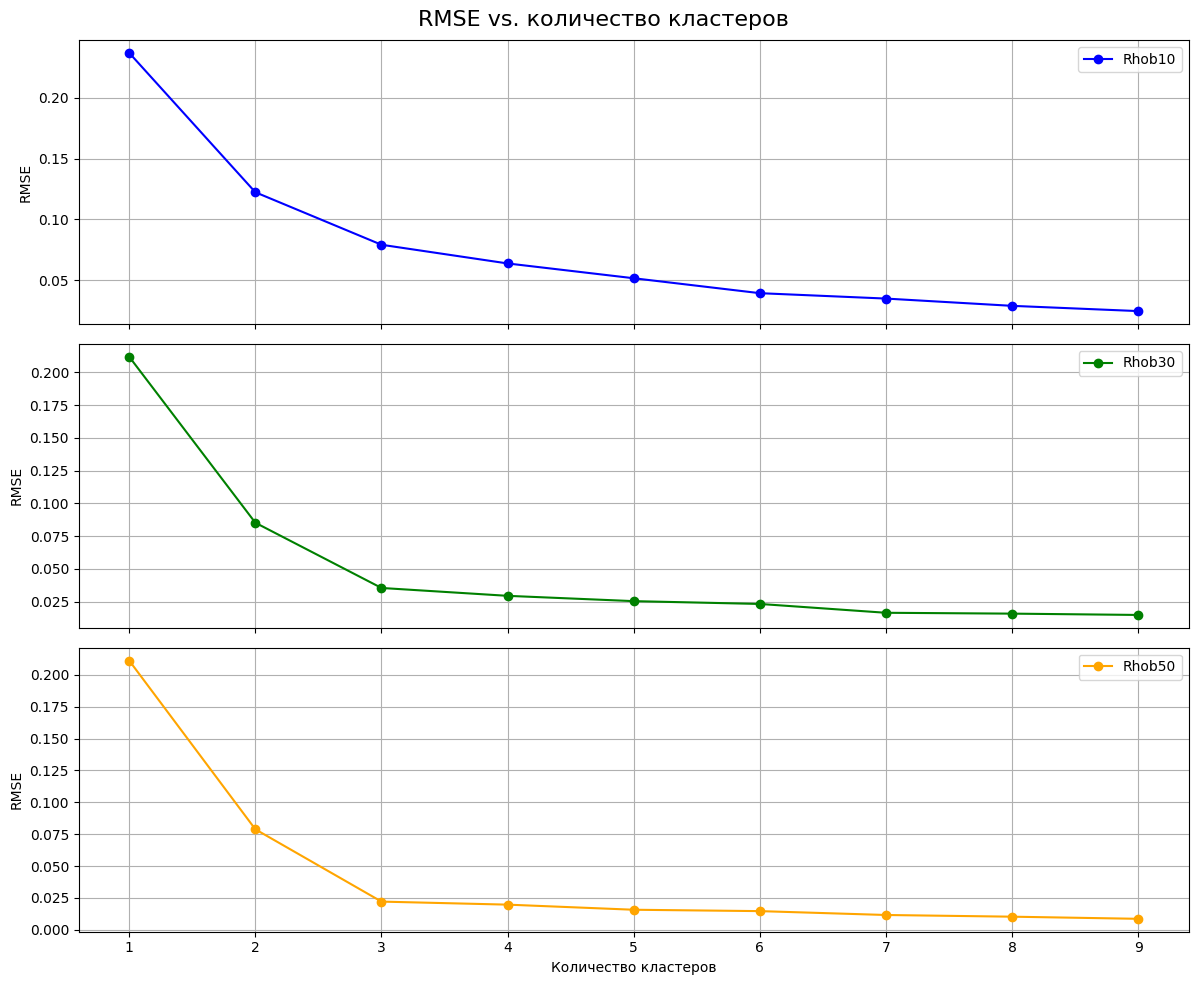

In [37]:
num_clusters = np.arange(1, 10)

rmses = []

for data, name in rhobs:
    current_rmse = []
    for i in num_clusters:
        current_rmse.append(RMSE(data, k_means(data, i)))
    rmses.append((current_rmse, name))


fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

for idx, (rmse_values, name) in enumerate(rmses):
    axs[idx].plot(n_appr, rmse_values, marker='o', label=name, color=colors[idx])
    axs[idx].set_ylabel("RMSE")
    axs[idx].grid()
    axs[idx].legend()

fig.suptitle("RMSE vs. количество кластеров", fontsize=16)

axs[-1].set_xlabel("Количество кластеров")

plt.tight_layout()
plt.show()

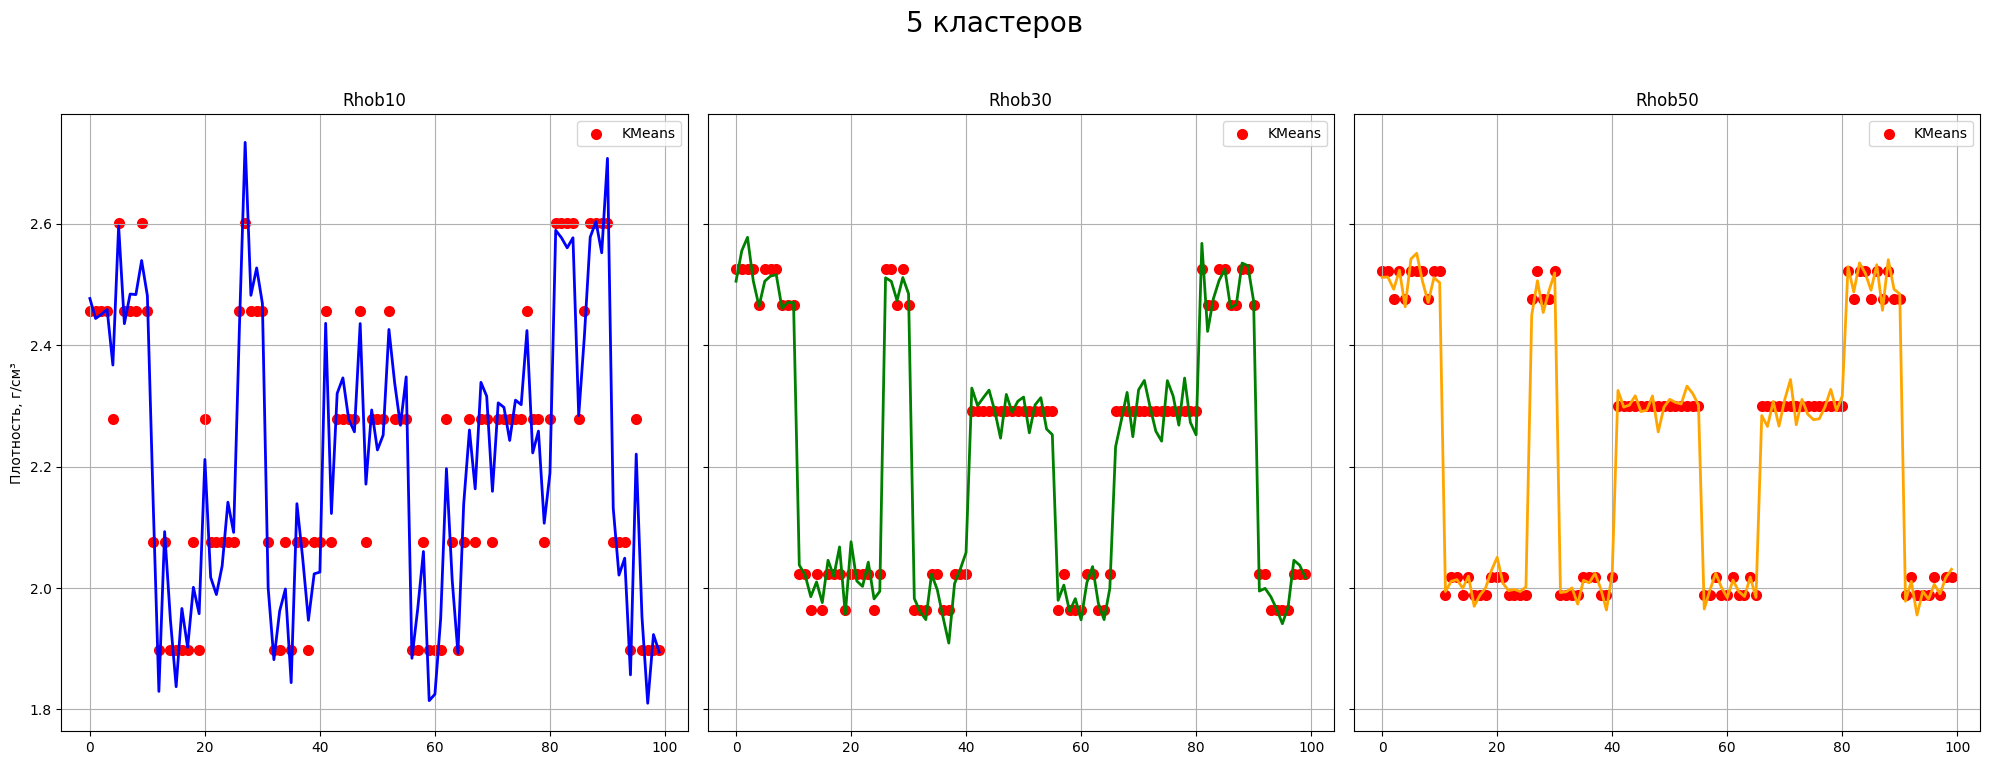

In [45]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8), sharey=True)

for i, ((data, title), color) in enumerate(zip(rhobs, colors)):
    kmeans_result = k_means(data, 5)

    ax = axes[i]
    ax.plot(x, data, linewidth=2, color=color)
    ax.scatter(x, kmeans_result, label="KMeans", linewidth=2, color='red')

    ax.set_title(title)
    if i == 0:
        ax.set_ylabel("Плотность, г/см³")
    ax.legend(loc='upper right')
    ax.grid(True)

fig.suptitle("5 кластеров", fontsize=20)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()